
Assignment: Compresive Strength Concrete Problem
Abstract:
Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.


Data Set Characteristics:  

Multivariate

Number of Instances:

1030

Area:

Physical

Attribute Characteristics:

Real

Number of Attributes:

9

Date Donated

2007-08-03

Associated Tasks:

Regression

Missing Values?

N/A

Number of Web Hits:

231464

Description:
Features Name	Data Type	Measurement	Description
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable Water (component 4) | quantitative | kg in a m3 mixture | Input Variable Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable Age | quantitative | Day (1~365) | Input Variable Concrete compressive strength | quantitative | MPa | Output Variable

WORKFLOW :
Load Data
Check Missing Values ( If Exist ; Fill each record with mean of its feature )
Standardized the Input Variables. Hint: Centeralized the data
Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
Train the Model with Epochs (100) and validate it
If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
Evaluation Step
Prediction
Load Data:
Click Here to Download DataSet

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Concrete Strength

04/09/2021  10:04 PM    <DIR>          .
04/09/2021  10:04 PM    <DIR>          ..
04/08/2021  08:53 AM    <DIR>          .ipynb_checkpoints
04/07/2021  09:41 PM            59,285 compresive_strength_concrete.csv
04/09/2021  10:04 PM           180,617 Concrete.ipynb
04/08/2021  08:52 AM                72 Untitled.ipynb
               3 File(s)        239,974 bytes
               3 Dir(s)  211,458,252,800 bytes free


In [30]:
dfconcrete = pd.read_csv('compresive_strength_concrete.csv')

In [31]:
dfconcrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [32]:
dfconcrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [33]:
dfconcrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [34]:
dfconcrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [35]:
dfconcrete.shape

(1030, 9)

array([[<AxesSubplot:title={'center':'Cement (component 1)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<AxesSubplot:title={'center':'Water  (component 4)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<AxesSubplot:title={'center':'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <AxesSubplot:title={'center':'Age (day)'}>,
        <AxesSubplot:title={'center':'Concrete compressive strength(MPa, megapascals) '}>]],
      dtype=object)

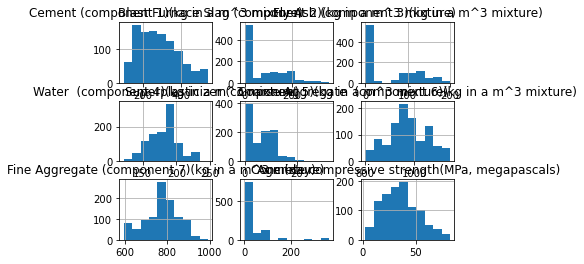

In [36]:
dfconcrete.hist()

In [37]:
import seaborn as sns

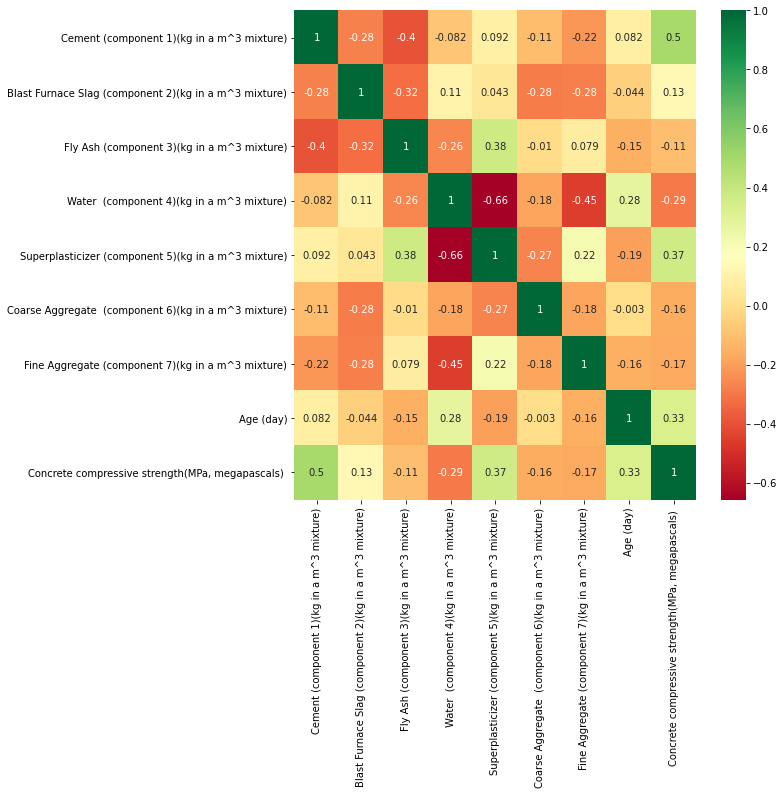

In [38]:
corrmat = dfconcrete.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (9, 9))
g = sns.heatmap(dfconcrete[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [39]:
dfconcrete.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Strength'}, inplace = True)

In [40]:
dfconcrete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [41]:
concrete_strength = dfconcrete['Strength'].values

In [42]:
concrete_features = dfconcrete.drop(['Strength'], axis = 1).values

In [43]:
from sklearn import preprocessing

In [44]:
#min_max_scaler = preprocessing.MinMaxScaler()
#concrete_features_scaled = min_max_scaler.fit_transform(concrete_features)

standard_scaler = preprocessing.StandardScaler()
concrete_features_scaled = standard_scaler.fit_transform(concrete_features)

In [45]:
concrete_features_scaled

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
features_trainval, features_test, strength_trainval, strength_test = train_test_split(concrete_features_scaled, concrete_strength, test_size=0.3, random_state=42)

In [48]:
print(features_trainval.shape);
print(features_test.shape);
print(strength_trainval.shape);
print(strength_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


In [49]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [50]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=(8,)))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'], optimizer='adam') #rmsprop
    return model

In [51]:
from sklearn.model_selection import KFold

In [52]:
kf = KFold(n_splits=3)

In [53]:
all_scores = []

In [54]:
for train_index, test_index in kf.split(features_trainval):
    #print("TRAIN:", train_index, "TEST:", test_index)
    features_trainval_train , features_trainval_test = features_trainval[train_index], features_trainval[test_index]
    strength_trainval_train , strength_trainval_test = strength_trainval[train_index] , strength_trainval[test_index]
    model = build_model()
    history = model.fit(features_trainval_train, strength_trainval_train, epochs=1000, batch_size=10)
    history_dict = history.history
    val_mse, val_mae = model.evaluate(features_trainval_test, strength_trainval_test)
    all_scores.append(val_mae)

Epoch 1/1000
48/48 [==============================] - 0s 773us/step - loss: 1506.2947 - mae: 35.3038
Epoch 2/1000
48/48 [==============================] - 0s 802us/step - loss: 1417.0819 - mae: 34.0279
Epoch 3/1000
48/48 [==============================] - 0s 796us/step - loss: 1267.0153 - mae: 31.7560
Epoch 4/1000
48/48 [==============================] - 0s 706us/step - loss: 1036.7885 - mae: 28.0996
Epoch 5/1000
48/48 [==============================] - 0s 686us/step - loss: 745.6854 - mae: 22.9717
Epoch 6/1000
48/48 [==============================] - 0s 686us/step - loss: 466.7709 - mae: 17.5572
Epoch 7/1000
48/48 [==============================] - 0s 686us/step - loss: 289.5033 - mae: 13.6006
Epoch 8/1000
48/48 [==============================] - 0s 686us/step - loss: 211.5531 - mae: 11.7713
Epoch 9/1000
48/48 [==============================] - 0s 727us/step - loss: 184.8727 - mae: 10.9667
Epoch 10/1000
48/48 [==============================] - 0s 631us/step - loss: 171.6848 - mae: 10.

48/48 [==============================] - 0s 726us/step - loss: 35.3818 - mae: 4.5917
Epoch 84/1000
48/48 [==============================] - 0s 665us/step - loss: 35.2128 - mae: 4.6007
Epoch 85/1000
48/48 [==============================] - 0s 706us/step - loss: 34.8325 - mae: 4.5362
Epoch 86/1000
48/48 [==============================] - 0s 686us/step - loss: 34.2265 - mae: 4.4731
Epoch 87/1000
48/48 [==============================] - 0s 727us/step - loss: 33.9892 - mae: 4.5077
Epoch 88/1000
48/48 [==============================] - 0s 644us/step - loss: 33.4279 - mae: 4.4736
Epoch 89/1000
48/48 [==============================] - 0s 810us/step - loss: 33.0425 - mae: 4.4386
Epoch 90/1000
48/48 [==============================] - 0s 741us/step - loss: 33.0407 - mae: 4.4443
Epoch 91/1000
48/48 [==============================] - 0s 769us/step - loss: 32.6696 - mae: 4.3857
Epoch 92/1000
48/48 [==============================] - 0s 810us/step - loss: 32.3241 - mae: 4.4038
Epoch 93/1000
48/48 [===

48/48 [==============================] - 0s 935us/step - loss: 24.7667 - mae: 3.8253
Epoch 166/1000
48/48 [==============================] - 0s 894us/step - loss: 24.4724 - mae: 3.7852
Epoch 167/1000
48/48 [==============================] - 0s 893us/step - loss: 24.6075 - mae: 3.8194
Epoch 168/1000
48/48 [==============================] - 0s 810us/step - loss: 24.5032 - mae: 3.7663
Epoch 169/1000
48/48 [==============================] - 0s 810us/step - loss: 24.5569 - mae: 3.8007
Epoch 170/1000
48/48 [==============================] - 0s 748us/step - loss: 24.2791 - mae: 3.7671
Epoch 171/1000
48/48 [==============================] - 0s 644us/step - loss: 24.4676 - mae: 3.7830
Epoch 172/1000
48/48 [==============================] - 0s 686us/step - loss: 24.2288 - mae: 3.7634
Epoch 173/1000
48/48 [==============================] - 0s 727us/step - loss: 24.2432 - mae: 3.7636
Epoch 174/1000
48/48 [==============================] - 0s 686us/step - loss: 24.4154 - mae: 3.7852
Epoch 175/1000


48/48 [==============================] - 0s 1ms/step - loss: 21.7165 - mae: 3.5674
Epoch 249/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.4277 - mae: 3.5518
Epoch 250/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.5702 - mae: 3.5481
Epoch 251/1000
48/48 [==============================] - 0s 977us/step - loss: 21.5866 - mae: 3.5736
Epoch 252/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.1887 - mae: 3.5199
Epoch 253/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.4357 - mae: 3.5298
Epoch 254/1000
48/48 [==============================] - 0s 1ms/step - loss: 22.0501 - mae: 3.6184
Epoch 255/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.7477 - mae: 3.5696
Epoch 256/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.1925 - mae: 3.5430
Epoch 257/1000
48/48 [==============================] - 0s 1ms/step - loss: 21.3685 - mae: 3.5397
Epoch 258/1000
48/48 [===========

48/48 [==============================] - 0s 540us/step - loss: 20.2496 - mae: 3.4464
Epoch 331/1000
48/48 [==============================] - 0s 519us/step - loss: 20.0321 - mae: 3.3843
Epoch 332/1000
48/48 [==============================] - 0s 540us/step - loss: 20.3587 - mae: 3.4441
Epoch 333/1000
48/48 [==============================] - 0s 665us/step - loss: 19.8351 - mae: 3.4238
Epoch 334/1000
48/48 [==============================] - 0s 540us/step - loss: 20.3838 - mae: 3.4113
Epoch 335/1000
48/48 [==============================] - 0s 540us/step - loss: 20.0312 - mae: 3.4369
Epoch 336/1000
48/48 [==============================] - 0s 561us/step - loss: 19.9580 - mae: 3.4406
Epoch 337/1000
48/48 [==============================] - 0s 519us/step - loss: 19.7521 - mae: 3.3908
Epoch 338/1000
48/48 [==============================] - 0s 519us/step - loss: 20.1250 - mae: 3.4119
Epoch 339/1000
48/48 [==============================] - 0s 561us/step - loss: 19.8904 - mae: 3.4212
Epoch 340/1000


48/48 [==============================] - 0s 686us/step - loss: 18.8671 - mae: 3.3158
Epoch 413/1000
48/48 [==============================] - 0s 685us/step - loss: 18.6010 - mae: 3.3264
Epoch 414/1000
48/48 [==============================] - 0s 665us/step - loss: 19.2724 - mae: 3.3625
Epoch 415/1000
48/48 [==============================] - 0s 665us/step - loss: 19.4770 - mae: 3.3819
Epoch 416/1000
48/48 [==============================] - 0s 665us/step - loss: 19.0406 - mae: 3.3222
Epoch 417/1000
48/48 [==============================] - 0s 686us/step - loss: 18.8126 - mae: 3.3320
Epoch 418/1000
48/48 [==============================] - 0s 671us/step - loss: 18.9116 - mae: 3.3234
Epoch 419/1000
48/48 [==============================] - 0s 706us/step - loss: 19.2863 - mae: 3.3426
Epoch 420/1000
48/48 [==============================] - 0s 644us/step - loss: 18.8310 - mae: 3.3327
Epoch 421/1000
48/48 [==============================] - 0s 686us/step - loss: 18.6762 - mae: 3.3246
Epoch 422/1000


48/48 [==============================] - 0s 810us/step - loss: 17.9288 - mae: 3.2368
Epoch 495/1000
48/48 [==============================] - 0s 935us/step - loss: 17.8763 - mae: 3.2331
Epoch 496/1000
48/48 [==============================] - 0s 790us/step - loss: 17.7040 - mae: 3.2157
Epoch 497/1000
48/48 [==============================] - 0s 852us/step - loss: 17.8027 - mae: 3.2505
Epoch 498/1000
48/48 [==============================] - 0s 873us/step - loss: 17.9350 - mae: 3.2369
Epoch 499/1000
48/48 [==============================] - 0s 769us/step - loss: 17.8247 - mae: 3.2463
Epoch 500/1000
48/48 [==============================] - 0s 831us/step - loss: 18.1434 - mae: 3.2549
Epoch 501/1000
48/48 [==============================] - 0s 997us/step - loss: 17.7021 - mae: 3.2135
Epoch 502/1000
48/48 [==============================] - 0s 1ms/step - loss: 17.6865 - mae: 3.2443
Epoch 503/1000
48/48 [==============================] - 0s 1ms/step - loss: 17.7767 - mae: 3.2517
Epoch 504/1000
48/4

48/48 [==============================] - 0s 769us/step - loss: 17.3366 - mae: 3.1665
Epoch 577/1000
48/48 [==============================] - 0s 831us/step - loss: 17.2338 - mae: 3.2267
Epoch 578/1000
48/48 [==============================] - 0s 1ms/step - loss: 16.8026 - mae: 3.1633
Epoch 579/1000
48/48 [==============================] - 0s 893us/step - loss: 16.5497 - mae: 3.1552
Epoch 580/1000
48/48 [==============================] - 0s 769us/step - loss: 17.1582 - mae: 3.1951
Epoch 581/1000
48/48 [==============================] - 0s 831us/step - loss: 16.8300 - mae: 3.1652
Epoch 582/1000
48/48 [==============================] - 0s 769us/step - loss: 17.2427 - mae: 3.1946
Epoch 583/1000
48/48 [==============================] - 0s 810us/step - loss: 16.5351 - mae: 3.1300
Epoch 584/1000
48/48 [==============================] - 0s 769us/step - loss: 16.8782 - mae: 3.1622
Epoch 585/1000
48/48 [==============================] - 0s 873us/step - loss: 16.9466 - mae: 3.1877
Epoch 586/1000
48

48/48 [==============================] - 0s 499us/step - loss: 16.1083 - mae: 3.0466
Epoch 660/1000
48/48 [==============================] - 0s 478us/step - loss: 16.4119 - mae: 3.1424
Epoch 661/1000
48/48 [==============================] - 0s 540us/step - loss: 16.0081 - mae: 3.0948
Epoch 662/1000
48/48 [==============================] - 0s 478us/step - loss: 16.2966 - mae: 3.1202
Epoch 663/1000
48/48 [==============================] - 0s 478us/step - loss: 16.4762 - mae: 3.1097
Epoch 664/1000
48/48 [==============================] - 0s 519us/step - loss: 15.9588 - mae: 3.0767
Epoch 665/1000
48/48 [==============================] - 0s 499us/step - loss: 16.2529 - mae: 3.1328
Epoch 666/1000
48/48 [==============================] - 0s 540us/step - loss: 16.3544 - mae: 3.0889
Epoch 667/1000
48/48 [==============================] - 0s 706us/step - loss: 16.1796 - mae: 3.1074
Epoch 668/1000
48/48 [==============================] - 0s 706us/step - loss: 16.3056 - mae: 3.1045
Epoch 669/1000


48/48 [==============================] - 0s 665us/step - loss: 15.2081 - mae: 2.9973
Epoch 742/1000
48/48 [==============================] - 0s 790us/step - loss: 15.2650 - mae: 2.9815
Epoch 743/1000
48/48 [==============================] - 0s 665us/step - loss: 15.2361 - mae: 3.0069
Epoch 744/1000
48/48 [==============================] - 0s 706us/step - loss: 15.0368 - mae: 2.9870
Epoch 745/1000
48/48 [==============================] - 0s 706us/step - loss: 15.3733 - mae: 2.9728
Epoch 746/1000
48/48 [==============================] - 0s 727us/step - loss: 15.4683 - mae: 3.0284
Epoch 747/1000
48/48 [==============================] - 0s 810us/step - loss: 15.4960 - mae: 3.0305
Epoch 748/1000
48/48 [==============================] - 0s 686us/step - loss: 15.2771 - mae: 3.0069
Epoch 749/1000
48/48 [==============================] - 0s 769us/step - loss: 15.7790 - mae: 3.0580
Epoch 750/1000
48/48 [==============================] - 0s 706us/step - loss: 15.3475 - mae: 3.0002
Epoch 751/1000


48/48 [==============================] - 0s 623us/step - loss: 14.3680 - mae: 2.8977
Epoch 824/1000
48/48 [==============================] - 0s 623us/step - loss: 14.6697 - mae: 2.9335
Epoch 825/1000
48/48 [==============================] - 0s 623us/step - loss: 14.8093 - mae: 2.9548
Epoch 826/1000
48/48 [==============================] - 0s 644us/step - loss: 14.5850 - mae: 2.9447
Epoch 827/1000
48/48 [==============================] - 0s 644us/step - loss: 15.0697 - mae: 2.9808
Epoch 828/1000
48/48 [==============================] - 0s 665us/step - loss: 14.7580 - mae: 2.9290
Epoch 829/1000
48/48 [==============================] - 0s 623us/step - loss: 14.7300 - mae: 2.9528
Epoch 830/1000
48/48 [==============================] - 0s 644us/step - loss: 15.3130 - mae: 2.9954
Epoch 831/1000
48/48 [==============================] - 0s 665us/step - loss: 14.5698 - mae: 2.9440
Epoch 832/1000
48/48 [==============================] - 0s 665us/step - loss: 14.4970 - mae: 2.9109
Epoch 833/1000


48/48 [==============================] - 0s 665us/step - loss: 13.7982 - mae: 2.8286
Epoch 906/1000
48/48 [==============================] - 0s 686us/step - loss: 14.3526 - mae: 2.8898
Epoch 907/1000
48/48 [==============================] - 0s 623us/step - loss: 14.3975 - mae: 2.9279
Epoch 908/1000
48/48 [==============================] - 0s 686us/step - loss: 14.2061 - mae: 2.8877
Epoch 909/1000
48/48 [==============================] - 0s 665us/step - loss: 14.3903 - mae: 2.8852
Epoch 910/1000
48/48 [==============================] - 0s 644us/step - loss: 14.0452 - mae: 2.8828
Epoch 911/1000
48/48 [==============================] - 0s 644us/step - loss: 14.1845 - mae: 2.8850
Epoch 912/1000
48/48 [==============================] - 0s 644us/step - loss: 13.9521 - mae: 2.8520
Epoch 913/1000
48/48 [==============================] - 0s 706us/step - loss: 13.6087 - mae: 2.7997
Epoch 914/1000
48/48 [==============================] - 0s 706us/step - loss: 14.0974 - mae: 2.8602
Epoch 915/1000


48/48 [==============================] - 0s 1ms/step - loss: 13.5326 - mae: 2.8109
Epoch 989/1000
48/48 [==============================] - 0s 1ms/step - loss: 12.9394 - mae: 2.7330
Epoch 990/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.2375 - mae: 2.7782
Epoch 991/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.3935 - mae: 2.7690
Epoch 992/1000
48/48 [==============================] - 0s 1ms/step - loss: 12.9673 - mae: 2.7363
Epoch 993/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.3034 - mae: 2.7972
Epoch 994/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.5137 - mae: 2.8033
Epoch 995/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.2763 - mae: 2.8080
Epoch 996/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.4211 - mae: 2.7884
Epoch 997/1000
48/48 [==============================] - 0s 1ms/step - loss: 13.1253 - mae: 2.7606
Epoch 998/1000
48/48 [=============

49/49 [==============================] - 0s 529us/step - loss: 42.2787 - mae: 4.8651
Epoch 70/1000
49/49 [==============================] - 0s 529us/step - loss: 40.4200 - mae: 4.7609
Epoch 71/1000
49/49 [==============================] - 0s 529us/step - loss: 40.2125 - mae: 4.7400
Epoch 72/1000
49/49 [==============================] - 0s 529us/step - loss: 39.4736 - mae: 4.6979
Epoch 73/1000
49/49 [==============================] - 0s 509us/step - loss: 39.0234 - mae: 4.6760
Epoch 74/1000
49/49 [==============================] - 0s 509us/step - loss: 38.8793 - mae: 4.6654
Epoch 75/1000
49/49 [==============================] - 0s 529us/step - loss: 38.2289 - mae: 4.6302
Epoch 76/1000
49/49 [==============================] - 0s 529us/step - loss: 38.5665 - mae: 4.6475
Epoch 77/1000
49/49 [==============================] - 0s 549us/step - loss: 37.5470 - mae: 4.5896
Epoch 78/1000
49/49 [==============================] - 0s 529us/step - loss: 38.7941 - mae: 4.7025
Epoch 79/1000
49/49 [===

49/49 [==============================] - 0s 590us/step - loss: 26.8718 - mae: 4.0044
Epoch 152/1000
49/49 [==============================] - 0s 611us/step - loss: 26.3633 - mae: 3.9759
Epoch 153/1000
49/49 [==============================] - 0s 529us/step - loss: 26.5203 - mae: 3.9753
Epoch 154/1000
49/49 [==============================] - 0s 570us/step - loss: 26.3382 - mae: 3.9671
Epoch 155/1000
49/49 [==============================] - 0s 550us/step - loss: 25.9474 - mae: 3.9526
Epoch 156/1000
49/49 [==============================] - 0s 550us/step - loss: 26.8199 - mae: 3.9748
Epoch 157/1000
49/49 [==============================] - 0s 570us/step - loss: 26.2283 - mae: 3.9426
Epoch 158/1000
49/49 [==============================] - 0s 550us/step - loss: 25.8405 - mae: 3.9248
Epoch 159/1000
49/49 [==============================] - 0s 550us/step - loss: 26.2561 - mae: 3.9531
Epoch 160/1000
49/49 [==============================] - 0s 529us/step - loss: 25.7338 - mae: 3.9448
Epoch 161/1000


49/49 [==============================] - 0s 713us/step - loss: 22.7850 - mae: 3.7486
Epoch 233/1000
49/49 [==============================] - 0s 692us/step - loss: 21.2863 - mae: 3.5907
Epoch 234/1000
49/49 [==============================] - 0s 692us/step - loss: 21.7415 - mae: 3.6312
Epoch 235/1000
49/49 [==============================] - 0s 651us/step - loss: 21.2393 - mae: 3.5816
Epoch 236/1000
49/49 [==============================] - 0s 712us/step - loss: 22.0247 - mae: 3.6252
Epoch 237/1000
49/49 [==============================] - 0s 692us/step - loss: 21.5416 - mae: 3.6110
Epoch 238/1000
49/49 [==============================] - 0s 672us/step - loss: 21.0539 - mae: 3.5799
Epoch 239/1000
49/49 [==============================] - 0s 672us/step - loss: 20.9565 - mae: 3.5520
Epoch 240/1000
49/49 [==============================] - 0s 685us/step - loss: 21.4152 - mae: 3.5875
Epoch 241/1000
49/49 [==============================] - 0s 733us/step - loss: 20.9956 - mae: 3.5745
Epoch 242/1000


49/49 [==============================] - 0s 1ms/step - loss: 18.0336 - mae: 3.3360
Epoch 315/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.6963 - mae: 3.3254
Epoch 316/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.2456 - mae: 3.3291
Epoch 317/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.0031 - mae: 3.3125
Epoch 318/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.7138 - mae: 3.3504
Epoch 319/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.5945 - mae: 3.3250
Epoch 320/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.4371 - mae: 3.3362
Epoch 321/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.0345 - mae: 3.3044
Epoch 322/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.0052 - mae: 3.2753
Epoch 323/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.8950 - mae: 3.3635
Epoch 324/1000
49/49 [=============

49/49 [==============================] - 0s 529us/step - loss: 15.8375 - mae: 3.0572
Epoch 398/1000
49/49 [==============================] - 0s 488us/step - loss: 16.4003 - mae: 3.0933
Epoch 399/1000
49/49 [==============================] - 0s 488us/step - loss: 15.7895 - mae: 3.0708
Epoch 400/1000
49/49 [==============================] - 0s 488us/step - loss: 15.8375 - mae: 3.0604
Epoch 401/1000
49/49 [==============================] - 0s 509us/step - loss: 15.9514 - mae: 3.0881
Epoch 402/1000
49/49 [==============================] - 0s 509us/step - loss: 15.7117 - mae: 3.0455
Epoch 403/1000
49/49 [==============================] - 0s 550us/step - loss: 16.0293 - mae: 3.1343
Epoch 404/1000
49/49 [==============================] - 0s 529us/step - loss: 15.4378 - mae: 3.0304
Epoch 405/1000
49/49 [==============================] - 0s 509us/step - loss: 15.9025 - mae: 3.0537
Epoch 406/1000
49/49 [==============================] - 0s 529us/step - loss: 16.0556 - mae: 3.0647
Epoch 407/1000


49/49 [==============================] - 0s 529us/step - loss: 13.6908 - mae: 2.8333
Epoch 480/1000
49/49 [==============================] - 0s 529us/step - loss: 13.9564 - mae: 2.7749
Epoch 481/1000
49/49 [==============================] - 0s 550us/step - loss: 13.6291 - mae: 2.8462
Epoch 482/1000
49/49 [==============================] - 0s 529us/step - loss: 13.4714 - mae: 2.7944
Epoch 483/1000
49/49 [==============================] - 0s 570us/step - loss: 13.9399 - mae: 2.8121
Epoch 484/1000
49/49 [==============================] - 0s 550us/step - loss: 13.3521 - mae: 2.7820
Epoch 485/1000
49/49 [==============================] - 0s 549us/step - loss: 13.5681 - mae: 2.7880
Epoch 486/1000
49/49 [==============================] - 0s 570us/step - loss: 13.6875 - mae: 2.8356
Epoch 487/1000
49/49 [==============================] - 0s 549us/step - loss: 13.8006 - mae: 2.8023
Epoch 488/1000
49/49 [==============================] - 0s 550us/step - loss: 13.5674 - mae: 2.7833
Epoch 489/1000


49/49 [==============================] - 0s 692us/step - loss: 13.2717 - mae: 2.7109
Epoch 561/1000
49/49 [==============================] - 0s 692us/step - loss: 12.2292 - mae: 2.6639
Epoch 562/1000
49/49 [==============================] - 0s 692us/step - loss: 11.9638 - mae: 2.5869
Epoch 563/1000
49/49 [==============================] - 0s 692us/step - loss: 12.2149 - mae: 2.6626
Epoch 564/1000
49/49 [==============================] - 0s 692us/step - loss: 12.4349 - mae: 2.6485
Epoch 565/1000
49/49 [==============================] - 0s 733us/step - loss: 14.2674 - mae: 2.9148
Epoch 566/1000
49/49 [==============================] - 0s 814us/step - loss: 11.8732 - mae: 2.6380
Epoch 567/1000
49/49 [==============================] - 0s 692us/step - loss: 12.8101 - mae: 2.7241
Epoch 568/1000
49/49 [==============================] - 0s 692us/step - loss: 12.1530 - mae: 2.6065
Epoch 569/1000
49/49 [==============================] - 0s 651us/step - loss: 12.0321 - mae: 2.6365
Epoch 570/1000


49/49 [==============================] - 0s 692us/step - loss: 10.8414 - mae: 2.4827
Epoch 642/1000
49/49 [==============================] - 0s 712us/step - loss: 10.8260 - mae: 2.4697
Epoch 643/1000
49/49 [==============================] - 0s 692us/step - loss: 11.4233 - mae: 2.5623
Epoch 644/1000
49/49 [==============================] - 0s 733us/step - loss: 11.0532 - mae: 2.4848
Epoch 645/1000
49/49 [==============================] - 0s 692us/step - loss: 11.1848 - mae: 2.4954
Epoch 646/1000
49/49 [==============================] - 0s 672us/step - loss: 11.1425 - mae: 2.5353
Epoch 647/1000
49/49 [==============================] - 0s 916us/step - loss: 10.7297 - mae: 2.4499
Epoch 648/1000
49/49 [==============================] - 0s 835us/step - loss: 10.7467 - mae: 2.4572
Epoch 649/1000
49/49 [==============================] - 0s 800us/step - loss: 10.8346 - mae: 2.4381
Epoch 650/1000
49/49 [==============================] - 0s 835us/step - loss: 11.4291 - mae: 2.5557
Epoch 651/1000


49/49 [==============================] - 0s 1ms/step - loss: 10.1510 - mae: 2.3773
Epoch 724/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.9951 - mae: 2.4448
Epoch 725/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.2718 - mae: 2.4195
Epoch 726/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.4110 - mae: 2.3876
Epoch 727/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.1058 - mae: 2.3552
Epoch 728/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.3207 - mae: 2.4116
Epoch 729/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.3125 - mae: 2.3678
Epoch 730/1000
49/49 [==============================] - 0s 1ms/step - loss: 11.1158 - mae: 2.5098
Epoch 731/1000
49/49 [==============================] - 0s 1ms/step - loss: 10.6013 - mae: 2.3871
Epoch 732/1000
49/49 [==============================] - 0s 1ms/step - loss: 9.7680 - mae: 2.3085
Epoch 733/1000
49/49 [==============

49/49 [==============================] - 0s 631us/step - loss: 9.6428 - mae: 2.2783
Epoch 807/1000
49/49 [==============================] - 0s 733us/step - loss: 9.5494 - mae: 2.3045
Epoch 808/1000
49/49 [==============================] - 0s 643us/step - loss: 10.1449 - mae: 2.3904
Epoch 809/1000
49/49 [==============================] - 0s 692us/step - loss: 9.6740 - mae: 2.3170
Epoch 810/1000
49/49 [==============================] - 0s 651us/step - loss: 9.6319 - mae: 2.2730
Epoch 811/1000
49/49 [==============================] - 0s 610us/step - loss: 9.4578 - mae: 2.2649
Epoch 812/1000
49/49 [==============================] - 0s 611us/step - loss: 9.6329 - mae: 2.3265
Epoch 813/1000
49/49 [==============================] - 0s 590us/step - loss: 10.2120 - mae: 2.3177
Epoch 814/1000
49/49 [==============================] - 0s 611us/step - loss: 9.5097 - mae: 2.2797
Epoch 815/1000
49/49 [==============================] - 0s 570us/step - loss: 9.3938 - mae: 2.2678
Epoch 816/1000
49/49 [=

49/49 [==============================] - 0s 529us/step - loss: 8.7129 - mae: 2.1652
Epoch 889/1000
49/49 [==============================] - 0s 539us/step - loss: 10.2094 - mae: 2.3826
Epoch 890/1000
49/49 [==============================] - 0s 651us/step - loss: 9.0421 - mae: 2.2422
Epoch 891/1000
49/49 [==============================] - 0s 590us/step - loss: 8.9422 - mae: 2.2128
Epoch 892/1000
49/49 [==============================] - 0s 590us/step - loss: 9.1519 - mae: 2.2104
Epoch 893/1000
49/49 [==============================] - 0s 488us/step - loss: 8.9388 - mae: 2.1947
Epoch 894/1000
49/49 [==============================] - 0s 515us/step - loss: 8.7954 - mae: 2.1769
Epoch 895/1000
49/49 [==============================] - 0s 509us/step - loss: 9.3852 - mae: 2.3111
Epoch 896/1000
49/49 [==============================] - 0s 512us/step - loss: 8.9095 - mae: 2.2214
Epoch 897/1000
49/49 [==============================] - 0s 550us/step - loss: 9.0486 - mae: 2.2079
Epoch 898/1000
49/49 [==

49/49 [==============================] - 0s 684us/step - loss: 9.0753 - mae: 2.2568
Epoch 971/1000
49/49 [==============================] - 0s 800us/step - loss: 8.8699 - mae: 2.1786
Epoch 972/1000
49/49 [==============================] - 0s 548us/step - loss: 8.8326 - mae: 2.2134
Epoch 973/1000
49/49 [==============================] - 0s 451us/step - loss: 8.9459 - mae: 2.1742
Epoch 974/1000
49/49 [==============================] - 0s 850us/step - loss: 8.6448 - mae: 2.1535
Epoch 975/1000
49/49 [==============================] - 0s 483us/step - loss: 8.7279 - mae: 2.1713
Epoch 976/1000
49/49 [==============================] - 0s 744us/step - loss: 8.8677 - mae: 2.1964
Epoch 977/1000
49/49 [==============================] - 0s 797us/step - loss: 8.5133 - mae: 2.1653
Epoch 978/1000
49/49 [==============================] - 0s 760us/step - loss: 8.8501 - mae: 2.2428
Epoch 979/1000
49/49 [==============================] - 0s 710us/step - loss: 8.7354 - mae: 2.1948
Epoch 980/1000
49/49 [===

49/49 [==============================] - 0s 1ms/step - loss: 55.2399 - mae: 5.5377
Epoch 52/1000
49/49 [==============================] - 0s 1ms/step - loss: 54.5104 - mae: 5.5017
Epoch 53/1000
49/49 [==============================] - 0s 1ms/step - loss: 53.5658 - mae: 5.4168
Epoch 54/1000
49/49 [==============================] - 0s 961us/step - loss: 52.7468 - mae: 5.4384
Epoch 55/1000
49/49 [==============================] - 0s 1ms/step - loss: 52.3738 - mae: 5.3926
Epoch 56/1000
49/49 [==============================] - 0s 1ms/step - loss: 51.7110 - mae: 5.3491
Epoch 57/1000
49/49 [==============================] - 0s 1ms/step - loss: 50.2504 - mae: 5.2425
Epoch 58/1000
49/49 [==============================] - 0s 894us/step - loss: 49.7283 - mae: 5.2204
Epoch 59/1000
49/49 [==============================] - 0s 1ms/step - loss: 49.2080 - mae: 5.2269
Epoch 60/1000
49/49 [==============================] - 0s 813us/step - loss: 48.4062 - mae: 5.1386
Epoch 61/1000
49/49 [=================

49/49 [==============================] - 0s 956us/step - loss: 30.3330 - mae: 4.0800
Epoch 135/1000
49/49 [==============================] - 0s 956us/step - loss: 30.1149 - mae: 4.0494
Epoch 136/1000
49/49 [==============================] - 0s 956us/step - loss: 30.9056 - mae: 4.0724
Epoch 137/1000
49/49 [==============================] - 0s 1ms/step - loss: 30.1958 - mae: 4.0660
Epoch 138/1000
49/49 [==============================] - 0s 1ms/step - loss: 29.6930 - mae: 4.0468
Epoch 139/1000
49/49 [==============================] - 0s 956us/step - loss: 29.5781 - mae: 4.0088
Epoch 140/1000
49/49 [==============================] - 0s 956us/step - loss: 29.9869 - mae: 4.0531
Epoch 141/1000
49/49 [==============================] - 0s 1ms/step - loss: 29.6254 - mae: 4.0378
Epoch 142/1000
49/49 [==============================] - 0s 929us/step - loss: 29.4710 - mae: 4.0329
Epoch 143/1000
49/49 [==============================] - 0s 971us/step - loss: 29.6441 - mae: 4.0213
Epoch 144/1000
49/49 

49/49 [==============================] - 0s 621us/step - loss: 24.0572 - mae: 3.6688
Epoch 217/1000
49/49 [==============================] - 0s 437us/step - loss: 24.1394 - mae: 3.6940
Epoch 218/1000
49/49 [==============================] - 0s 419us/step - loss: 24.9618 - mae: 3.7715
Epoch 219/1000
49/49 [==============================] - 0s 582us/step - loss: 24.3063 - mae: 3.7058
Epoch 220/1000
49/49 [==============================] - 0s 322us/step - loss: 24.1150 - mae: 3.6934
Epoch 221/1000
49/49 [==============================] - 0s 391us/step - loss: 23.8547 - mae: 3.6396
Epoch 222/1000
49/49 [==============================] - 0s 574us/step - loss: 24.0192 - mae: 3.6930
Epoch 223/1000
49/49 [==============================] - 0s 522us/step - loss: 23.5426 - mae: 3.6490
Epoch 224/1000
49/49 [==============================] - 0s 454us/step - loss: 24.2170 - mae: 3.6266
Epoch 225/1000
49/49 [==============================] - 0s 444us/step - loss: 24.0021 - mae: 3.6537
Epoch 226/1000


49/49 [==============================] - 0s 379us/step - loss: 21.5487 - mae: 3.4736
Epoch 298/1000
49/49 [==============================] - 0s 670us/step - loss: 21.6659 - mae: 3.4937
Epoch 299/1000
49/49 [==============================] - 0s 559us/step - loss: 21.3158 - mae: 3.4657
Epoch 300/1000
49/49 [==============================] - 0s 570us/step - loss: 21.3654 - mae: 3.4140
Epoch 301/1000
49/49 [==============================] - 0s 416us/step - loss: 21.9677 - mae: 3.5576
Epoch 302/1000
49/49 [==============================] - 0s 509us/step - loss: 21.7628 - mae: 3.4542
Epoch 303/1000
49/49 [==============================] - 0s 553us/step - loss: 22.0278 - mae: 3.5834
Epoch 304/1000
49/49 [==============================] - 0s 382us/step - loss: 21.1121 - mae: 3.4316
Epoch 305/1000
49/49 [==============================] - 0s 407us/step - loss: 21.3040 - mae: 3.4858
Epoch 306/1000
49/49 [==============================] - 0s 539us/step - loss: 21.4705 - mae: 3.4970
Epoch 307/1000


49/49 [==============================] - 0s 576us/step - loss: 19.4251 - mae: 3.3499
Epoch 380/1000
49/49 [==============================] - 0s 442us/step - loss: 19.3793 - mae: 3.3188
Epoch 381/1000
49/49 [==============================] - 0s 768us/step - loss: 19.6272 - mae: 3.3498
Epoch 382/1000
49/49 [==============================] - 0s 766us/step - loss: 19.9181 - mae: 3.3933
Epoch 383/1000
49/49 [==============================] - 0s 462us/step - loss: 19.6330 - mae: 3.2830
Epoch 384/1000
49/49 [==============================] - 0s 709us/step - loss: 19.6341 - mae: 3.3754
Epoch 385/1000
49/49 [==============================] - 0s 550us/step - loss: 19.7463 - mae: 3.3358
Epoch 386/1000
49/49 [==============================] - 0s 583us/step - loss: 19.2819 - mae: 3.2800
Epoch 387/1000
49/49 [==============================] - 0s 403us/step - loss: 19.5459 - mae: 3.2911
Epoch 388/1000
49/49 [==============================] - 0s 840us/step - loss: 19.1245 - mae: 3.2869
Epoch 389/1000


49/49 [==============================] - 0s 660us/step - loss: 17.4841 - mae: 3.1708
Epoch 462/1000
49/49 [==============================] - 0s 777us/step - loss: 16.9863 - mae: 3.1498
Epoch 463/1000
49/49 [==============================] - 0s 968us/step - loss: 17.0959 - mae: 3.0843
Epoch 464/1000
49/49 [==============================] - 0s 693us/step - loss: 17.1572 - mae: 3.1593
Epoch 465/1000
49/49 [==============================] - 0s 612us/step - loss: 17.2594 - mae: 3.1608
Epoch 466/1000
49/49 [==============================] - 0s 593us/step - loss: 17.0914 - mae: 3.1149
Epoch 467/1000
49/49 [==============================] - 0s 647us/step - loss: 16.8825 - mae: 3.0976
Epoch 468/1000
49/49 [==============================] - 0s 447us/step - loss: 16.8054 - mae: 3.0815
Epoch 469/1000
49/49 [==============================] - 0s 751us/step - loss: 18.0729 - mae: 3.1934
Epoch 470/1000
49/49 [==============================] - 0s 847us/step - loss: 18.1629 - mae: 3.2126
Epoch 471/1000


49/49 [==============================] - 0s 1ms/step - loss: 15.7366 - mae: 3.0251
Epoch 544/1000
49/49 [==============================] - 0s 818us/step - loss: 15.8547 - mae: 3.0279
Epoch 545/1000
49/49 [==============================] - 0s 914us/step - loss: 15.1388 - mae: 2.9595
Epoch 546/1000
49/49 [==============================] - 0s 846us/step - loss: 15.7041 - mae: 3.0280
Epoch 547/1000
49/49 [==============================] - 0s 1ms/step - loss: 15.3916 - mae: 2.9796
Epoch 548/1000
49/49 [==============================] - 0s 1ms/step - loss: 15.2948 - mae: 2.9938
Epoch 549/1000
49/49 [==============================] - 0s 1ms/step - loss: 15.3299 - mae: 2.9715
Epoch 550/1000
49/49 [==============================] - 0s 962us/step - loss: 15.0669 - mae: 2.9472
Epoch 551/1000
49/49 [==============================] - 0s 1ms/step - loss: 15.4743 - mae: 3.0144
Epoch 552/1000
49/49 [==============================] - 0s 1ms/step - loss: 15.4848 - mae: 3.0031
Epoch 553/1000
49/49 [=====

49/49 [==============================] - 0s 550us/step - loss: 14.5458 - mae: 2.8811
Epoch 626/1000
49/49 [==============================] - 0s 562us/step - loss: 15.9360 - mae: 3.0727
Epoch 627/1000
49/49 [==============================] - 0s 409us/step - loss: 14.2220 - mae: 2.8287
Epoch 628/1000
49/49 [==============================] - 0s 459us/step - loss: 13.7569 - mae: 2.8088
Epoch 629/1000
49/49 [==============================] - 0s 553us/step - loss: 14.0652 - mae: 2.8602
Epoch 630/1000
49/49 [==============================] - 0s 347us/step - loss: 14.1352 - mae: 2.8759
Epoch 631/1000
49/49 [==============================] - 0s 687us/step - loss: 14.1957 - mae: 2.8949
Epoch 632/1000
49/49 [==============================] - 0s 530us/step - loss: 13.9805 - mae: 2.8317
Epoch 633/1000
49/49 [==============================] - 0s 578us/step - loss: 14.0974 - mae: 2.8438
Epoch 634/1000
49/49 [==============================] - 0s 427us/step - loss: 14.2695 - mae: 2.8615
Epoch 635/1000


49/49 [==============================] - 0s 414us/step - loss: 13.3461 - mae: 2.7403
Epoch 707/1000
49/49 [==============================] - 0s 539us/step - loss: 13.6489 - mae: 2.8034
Epoch 708/1000
49/49 [==============================] - 0s 555us/step - loss: 13.2799 - mae: 2.7464
Epoch 709/1000
49/49 [==============================] - 0s 449us/step - loss: 13.3790 - mae: 2.7599
Epoch 710/1000
49/49 [==============================] - 0s 466us/step - loss: 13.6733 - mae: 2.7783
Epoch 711/1000
49/49 [==============================] - 0s 587us/step - loss: 13.1656 - mae: 2.7404
Epoch 712/1000
49/49 [==============================] - 0s 373us/step - loss: 12.9552 - mae: 2.6928
Epoch 713/1000
49/49 [==============================] - 0s 699us/step - loss: 13.0532 - mae: 2.7261
Epoch 714/1000
49/49 [==============================] - 0s 517us/step - loss: 13.2611 - mae: 2.7508
Epoch 715/1000
49/49 [==============================] - 0s 583us/step - loss: 13.8032 - mae: 2.7818
Epoch 716/1000


49/49 [==============================] - 0s 628us/step - loss: 13.0066 - mae: 2.7070
Epoch 788/1000
49/49 [==============================] - 0s 683us/step - loss: 12.6929 - mae: 2.6687
Epoch 789/1000
49/49 [==============================] - 0s 420us/step - loss: 13.2329 - mae: 2.7072
Epoch 790/1000
49/49 [==============================] - 0s 631us/step - loss: 14.2181 - mae: 2.8665
Epoch 791/1000
49/49 [==============================] - 0s 562us/step - loss: 12.7583 - mae: 2.6733
Epoch 792/1000
49/49 [==============================] - 0s 526us/step - loss: 12.5340 - mae: 2.6523
Epoch 793/1000
49/49 [==============================] - 0s 756us/step - loss: 12.4115 - mae: 2.6297
Epoch 794/1000
49/49 [==============================] - 0s 715us/step - loss: 12.8644 - mae: 2.6831
Epoch 795/1000
49/49 [==============================] - 0s 894us/step - loss: 12.7400 - mae: 2.6711
Epoch 796/1000
49/49 [==============================] - 0s 442us/step - loss: 12.9544 - mae: 2.6939
Epoch 797/1000


49/49 [==============================] - 0s 716us/step - loss: 11.8949 - mae: 2.5767
Epoch 870/1000
49/49 [==============================] - 0s 499us/step - loss: 12.0297 - mae: 2.6191
Epoch 871/1000
49/49 [==============================] - 0s 797us/step - loss: 12.0270 - mae: 2.5876
Epoch 872/1000
49/49 [==============================] - 0s 816us/step - loss: 12.1114 - mae: 2.6063
Epoch 873/1000
49/49 [==============================] - 0s 468us/step - loss: 12.1161 - mae: 2.6251
Epoch 874/1000
49/49 [==============================] - 0s 764us/step - loss: 11.9097 - mae: 2.5527
Epoch 875/1000
49/49 [==============================] - 0s 507us/step - loss: 11.9403 - mae: 2.5927
Epoch 876/1000
49/49 [==============================] - 0s 968us/step - loss: 11.9303 - mae: 2.5679
Epoch 877/1000
49/49 [==============================] - 0s 580us/step - loss: 11.7635 - mae: 2.5487
Epoch 878/1000
49/49 [==============================] - 0s 771us/step - loss: 12.3167 - mae: 2.6178
Epoch 879/1000


49/49 [==============================] - 0s 1ms/step - loss: 11.6377 - mae: 2.5393
Epoch 952/1000
49/49 [==============================] - 0s 1ms/step - loss: 11.7694 - mae: 2.5640
Epoch 953/1000
49/49 [==============================] - 0s 911us/step - loss: 11.6814 - mae: 2.5723
Epoch 954/1000
49/49 [==============================] - 0s 1ms/step - loss: 11.4674 - mae: 2.5031
Epoch 955/1000
49/49 [==============================] - 0s 863us/step - loss: 11.3391 - mae: 2.5115
Epoch 956/1000
49/49 [==============================] - 0s 829us/step - loss: 11.4015 - mae: 2.5534
Epoch 957/1000
49/49 [==============================] - 0s 787us/step - loss: 11.2533 - mae: 2.4767
Epoch 958/1000
49/49 [==============================] - 0s 1ms/step - loss: 11.5894 - mae: 2.5232
Epoch 959/1000
49/49 [==============================] - 0s 787us/step - loss: 11.4922 - mae: 2.5510
Epoch 960/1000
49/49 [==============================] - 0s 1ms/step - loss: 11.9268 - mae: 2.5900
Epoch 961/1000
49/49 [===

In [55]:
all_scores

[5.408962726593018, 3.9780726432800293, 4.776045799255371]

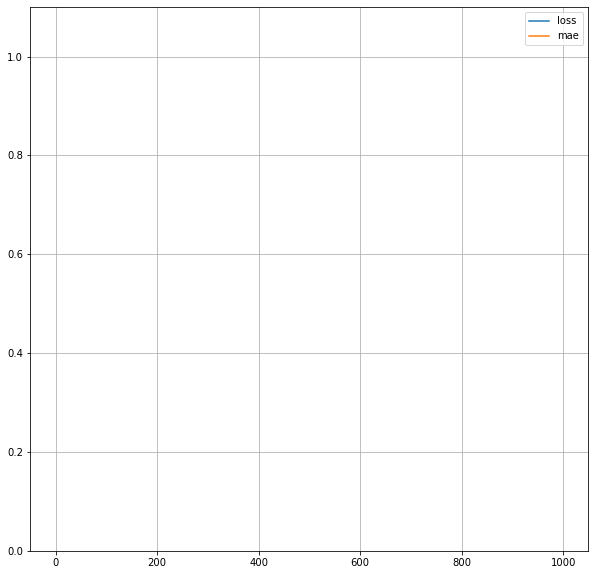

In [56]:
pd.DataFrame(history.history).plot(figsize = (10,10))
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.show()

In [57]:
history_dict.keys()

dict_keys(['loss', 'mae'])

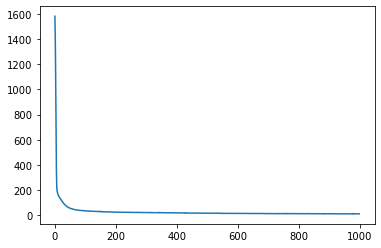

In [58]:
plt.plot(history_dict['loss'])

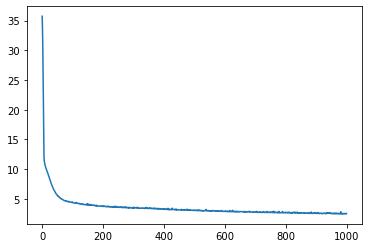

In [59]:
plt.plot(history_dict['mae'])

In [60]:
val_mse, val_mae = model.evaluate(features_test, strength_test)

10/10 [==============================] - 0s 1ms/step - loss: 42.6212 - mae: 4.8048


In [61]:
model.predict(features_test)

array([[49.78262  ],
       [40.50881  ],
       [65.19437  ],
       [36.029503 ],
       [13.362068 ],
       [45.24008  ],
       [26.645159 ],
       [48.61804  ],
       [37.895786 ],
       [44.85266  ],
       [41.44703  ],
       [14.264302 ],
       [47.824585 ],
       [44.38435  ],
       [25.671015 ],
       [22.609762 ],
       [37.106236 ],
       [19.271444 ],
       [36.59729  ],
       [29.095028 ],
       [34.456913 ],
       [30.925806 ],
       [46.031693 ],
       [13.976762 ],
       [26.718956 ],
       [43.685078 ],
       [ 7.692634 ],
       [49.716675 ],
       [52.63379  ],
       [20.022654 ],
       [48.58855  ],
       [35.493835 ],
       [55.142075 ],
       [59.479412 ],
       [20.937708 ],
       [40.372433 ],
       [38.208435 ],
       [41.305145 ],
       [ 9.690012 ],
       [50.70388  ],
       [12.883743 ],
       [ 5.049311 ],
       [31.866932 ],
       [45.865726 ],
       [11.803765 ],
       [77.65474  ],
       [49.052544 ],
       [37.17

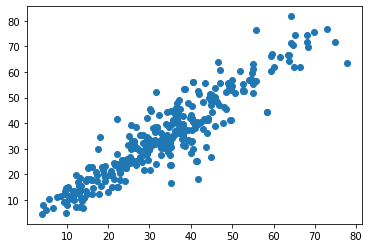

In [62]:
plt.scatter(model.predict(features_test), strength_test)